# Likes vs Loyalty: Do Social Media Mentions Drive Customer Spending?

🎯 Goal:
Investigate whether social media popularity (Instagram and TikTok mentions) actually translates to real customer spending and brand loyalty.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('true_cost_fast_fashion.csv')
df

,Brand,Country,Year,Monthly_Production_Tonnes,Avg_Item_Price_USD,Release_Cycles_Per_Year,Carbon_Emissions_tCO2e,Water_Usage_Million_Litres,Landfill_Waste_Tonnes,Avg_Worker_Wage_USD,...,Instagram_Mentions_Thousands,TikTok_Mentions_Thousands,Sentiment_Score,Social_Sentiment_Label,GDP_Contribution_Million_USD,Env_Cost_Index,Sustainability_Score,Transparency_Index,Compliance_Score,Ethical_Rating
0,Shein,Indonesia,2017,574.51,19.31,16,11421.58,282.11,616.63,143.79,...,4655,3435,0.05,Neutral,608.51,0.49,29.12,61.19,13.95,1.46
1,Forever 21,Vietnam,2024,394.50,9.30,20,5571.01,289.22,795.11,167.78,...,9655,6285,-0.12,Positive,689.49,0.21,49.52,3.44,90.93,1.29
2,Uniqlo,India,2024,310.23,25.46,11,10969.00,116.39,364.33,97.81,...,8016,387,0.08,Neutral,439.78,0.63,96.53,60.70,27.60,1.48
3,Forever 21,USA,2017,218.65,13.17,13,13093.00,255.88,632.16,134.54,...,8254,1620,-0.06,Neutral,746.70,0.21,71.32,76.08,56.13,3.85
4,Zara,Indonesia,2016,1005.84,15.40,20,9548.40,142.07,830.10,144.33,...,1778,3292,-0.59,Neutral,571.42,0.95,59.89,69.48,88.05,3.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Zara,India,2020,549.36,17.77,21,11214.01,87.08,768.13,165.22,...,3079,3053,0.06,Negative,582.87,0.99,26.52,21.80,33.48,2.63
2996,Shein,USA,2021,670.54,18.05,24,10548.69,275.01,950.90,143.33,...,5297,2617,0.40,Positive,274.78,0.25,89.54,24.81,94.90,0.08
2997,Zara,China,2023,370.31,22.25,22,3385.09,211.81,906.82,104.30,...,6427,4743,-0.71,Negative,607.47,0.75,42.57,75.29,55.28,0.20
2998,Shein,Brazil,2015,649.20,23.00,14,10822.80,232.33,818.08,140.45,...,4487,5178,-0.34,Negative,509.98,0.32,5.59,16.66,20.73,2.89


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brand                         3000 non-null   object 
 1   Country                       3000 non-null   object 
 2   Year                          3000 non-null   int64  
 3   Monthly_Production_Tonnes     3000 non-null   float64
 4   Avg_Item_Price_USD            3000 non-null   float64
 5   Release_Cycles_Per_Year       3000 non-null   int64  
 6   Carbon_Emissions_tCO2e        3000 non-null   float64
 7   Water_Usage_Million_Litres    3000 non-null   float64
 8   Landfill_Waste_Tonnes         3000 non-null   float64
 9   Avg_Worker_Wage_USD           3000 non-null   float64
 10  Working_Hours_Per_Week        3000 non-null   int64  
 11  Child_Labor_Incidents         3000 non-null   int64  
 12  Return_Rate_Percent           3000 non-null   float64
 13  Avg

In [5]:
df.describe()

,Year,Monthly_Production_Tonnes,Avg_Item_Price_USD,Release_Cycles_Per_Year,Carbon_Emissions_tCO2e,Water_Usage_Million_Litres,Landfill_Waste_Tonnes,Avg_Worker_Wage_USD,Working_Hours_Per_Week,Child_Labor_Incidents,...,Shopping_Frequency_Per_Year,Instagram_Mentions_Thousands,TikTok_Mentions_Thousands,Sentiment_Score,GDP_Contribution_Million_USD,Env_Cost_Index,Sustainability_Score,Transparency_Index,Compliance_Score,Ethical_Rating
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,2019.529667,497.319890,19.936187,17.757333,10003.873717,200.924420,795.028837,149.817727,54.695000,0.997000,...,11.008333,5054.240667,3975.165667,0.001597,503.092523,0.555630,49.854920,49.55111,49.964307,2.521597
std,2.894002,149.543176,4.919126,6.981358,3017.980553,60.483385,201.440989,49.792421,8.648675,1.005648,...,4.909613,2858.367381,2268.386606,0.579073,195.961926,0.263294,28.627411,28.98745,28.855005,1.443130
min,2015.000000,3.820000,1.090000,6.000000,206.090000,-38.060000,58.240000,-52.700000,40.000000,0.000000,...,3.000000,110.000000,54.000000,-1.000000,-96.430000,0.100000,0.010000,0.07000,0.030000,0.000000
25%,2017.000000,396.360000,16.540000,12.000000,7892.112500,160.317500,655.840000,116.692500,47.000000,0.000000,...,7.000000,2558.750000,2046.250000,-0.490000,369.370000,0.330000,25.322500,25.13000,25.352500,1.270000
50%,2020.000000,495.535000,19.890000,18.000000,9926.940000,200.315000,799.995000,149.695000,55.000000,1.000000,...,11.000000,5055.500000,3946.500000,0.010000,503.990000,0.560000,50.400000,49.04000,50.235000,2.530000
75%,2022.000000,596.800000,23.320000,24.000000,12012.625000,240.662500,934.147500,183.747500,62.000000,2.000000,...,15.000000,7499.250000,5854.250000,0.500000,634.150000,0.780000,74.562500,75.14500,74.640000,3.792500
max,2024.000000,1005.840000,36.460000,29.000000,19585.470000,403.830000,1480.380000,326.450000,69.000000,5.000000,...,19.000000,9998.000000,7995.000000,1.000000,1145.800000,1.000000,99.990000,99.97000,100.000000,5.000000


In [6]:
df['Brand'].unique()

array(['Shein', 'Forever 21', 'Uniqlo', 'Zara', 'H&M'], dtype=object)

In [7]:
df['Country'].value_counts()

Country
India         314
USA           312
Germany       309
UK            309
Indonesia     300
Turkey        300
Vietnam       297
Bangladesh    296
Brazil        293
China         270
Name: count, dtype: int64

1. Do higher social media mentions correlate with higher average customer spending and more frequent purchases?

In [8]:
df.columns

Index(['Brand', 'Country', 'Year', 'Monthly_Production_Tonnes',
       'Avg_Item_Price_USD', 'Release_Cycles_Per_Year',
       'Carbon_Emissions_tCO2e', 'Water_Usage_Million_Litres',
       'Landfill_Waste_Tonnes', 'Avg_Worker_Wage_USD',
       'Working_Hours_Per_Week', 'Child_Labor_Incidents',
       'Return_Rate_Percent', 'Avg_Spend_Per_Customer_USD',
       'Shopping_Frequency_Per_Year', 'Instagram_Mentions_Thousands',
       'TikTok_Mentions_Thousands', 'Sentiment_Score',
       'Social_Sentiment_Label', 'GDP_Contribution_Million_USD',
       'Env_Cost_Index', 'Sustainability_Score', 'Transparency_Index',
       'Compliance_Score', 'Ethical_Rating'],
      dtype='object')

In [9]:
df['Total_Social_Mentions_Thousands'] = df['Instagram_Mentions_Thousands'] + df['TikTok_Mentions_Thousands']
df[['Total_Social_Mentions_Thousands']]

,Total_Social_Mentions_Thousands
0,8090
1,15940
2,8403
3,9874
4,5070
...,...
2995,6132
2996,7914
2997,11170
2998,9665


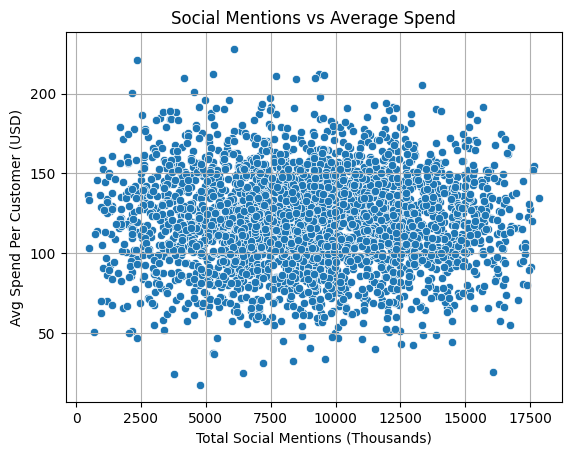

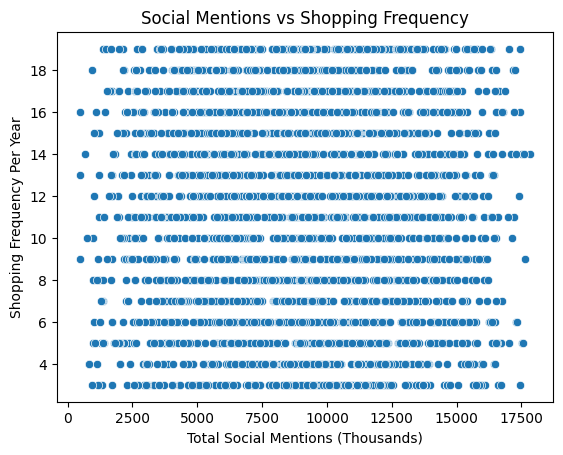

In [10]:
sns.scatterplot(x='Total_Social_Mentions_Thousands', y='Avg_Spend_Per_Customer_USD', data=df)
plt.title('Social Mentions vs Average Spend')
plt.xlabel('Total Social Mentions (Thousands)')
plt.ylabel('Avg Spend Per Customer (USD)')
plt.grid(True)
plt.show()

sns.scatterplot(x='Total_Social_Mentions_Thousands', y='Shopping_Frequency_Per_Year', data=df)
plt.title('Social Mentions vs Shopping Frequency')
plt.xlabel('Total Social Mentions (Thousands)')
plt.ylabel('Shopping Frequency Per Year')
plt.show()

In [11]:
df['Loyalty_Score'] = df['Avg_Spend_Per_Customer_USD'] * df['Shopping_Frequency_Per_Year']
df[['Loyalty_Score']]

,Loyalty_Score
0,317.76
1,407.96
2,2097.54
3,2189.18
4,1701.15
...,...
2995,949.00
2996,630.28
2997,1825.63
2998,417.72


In [12]:
correlation_df=df[['Total_Social_Mentions_Thousands', 'Avg_Spend_Per_Customer_USD', 'Shopping_Frequency_Per_Year', 'Loyalty_Score']].corr()
correlation_df


,Total_Social_Mentions_Thousands,Avg_Spend_Per_Customer_USD,Shopping_Frequency_Per_Year,Loyalty_Score
Total_Social_Mentions_Thousands,1.000000,-0.003131,-0.004573,-0.003774
Avg_Spend_Per_Customer_USD,-0.003131,1.000000,0.036977,0.494355
Shopping_Frequency_Per_Year,-0.004573,0.036977,1.000000,0.861707
Loyalty_Score,-0.003774,0.494355,0.861707,1.000000


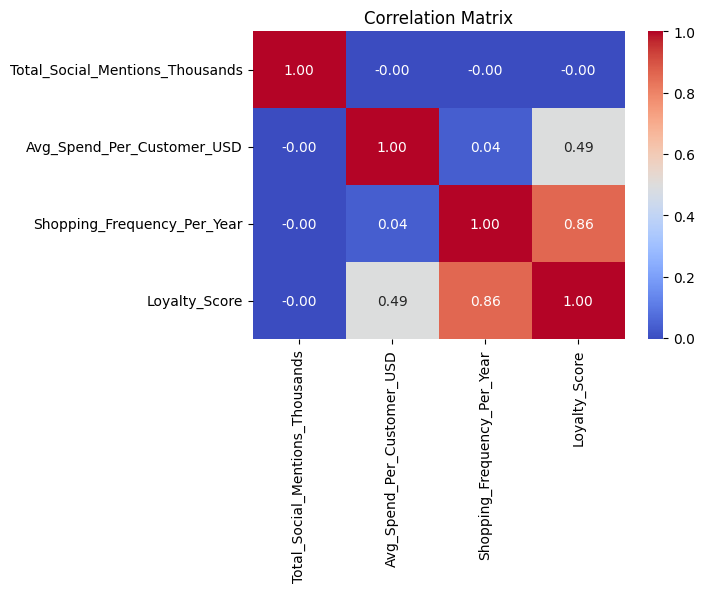

In [13]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

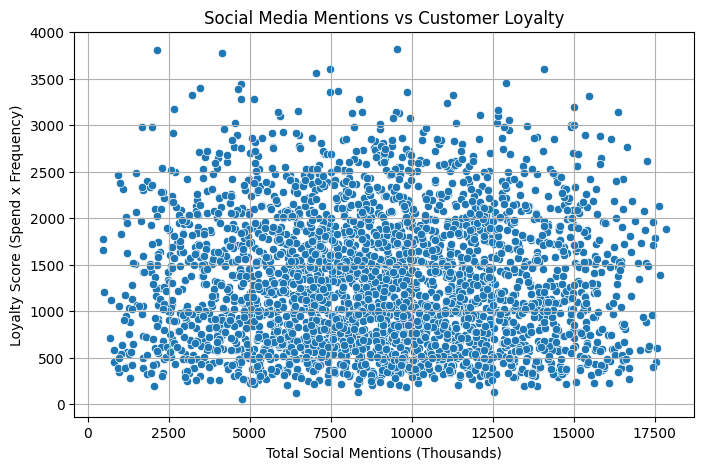

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='Total_Social_Mentions_Thousands',
    y='Loyalty_Score'
)
plt.title('Social Media Mentions vs Customer Loyalty')
plt.xlabel('Total Social Mentions (Thousands)')
plt.ylabel('Loyalty Score (Spend x Frequency)')
plt.grid(True)
plt.show()
